AJJAPALLI NITHISH REDDY


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving aerofit_treadmill.csv to aerofit_treadmill (3).csv


In [ ]:
df=pd.read_csv('aerofit_treadmill.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 180
Number of columns: 9


In [ ]:
df.isna().any()

,0
Product,False
Age,False
Gender,False
Education,False
MaritalStatus,False
Usage,False
Fitness,False
Income,False
Miles,False


In [ ]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### **Key Observations:**  

1. The dataset has no missing values.
2. There are three treadmill models(KP281, KP481, KP781).  
3. KP281 is the most popular model, purchased by 80 customers.  
4. Males (104) form the majority of buyers (57.8%).  
5. The average customer age is 28.8 years, with most between 24-33 years old.  
6. 107 customers are partnered, indicating a higher purchase tendency among them.  
7. Customers plan to use their treadmills 3.46 times per week on average.
  
8. The average annual income is $53,719, with a wide range from $29,562 to $104,581.  
9. Customers expect to walk or run around 103 miles per week on average.  
10. Higher-income individuals and frequent users are potential targets for premium models like KP781.

# **2. Detect Outliers**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


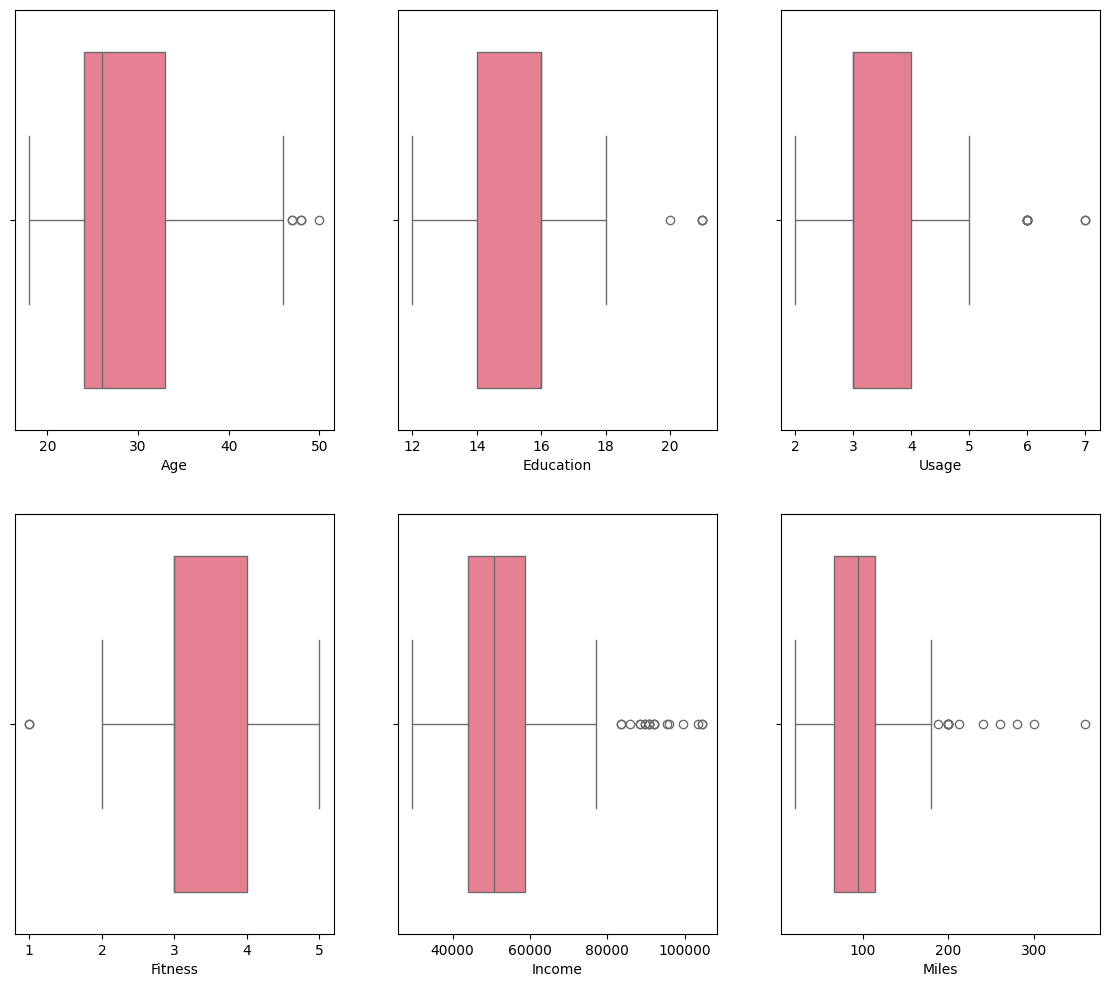

In [ ]:
plt.figure(figsize=(14,12))

plt.subplot(2,3,1)
sns.boxplot(data=df,x='Age')
plt.subplot(2,3,2)
sns.boxplot(data=df,x='Education')
plt.subplot(2,3,3)
sns.boxplot(data=df,x='Usage')
plt.subplot(2,3,4)
sns.boxplot(data=df,x='Fitness')
plt.subplot(2,3,5)
sns.boxplot(data=df,x='Income')
plt.subplot(2,3,6)
sns.boxplot(data=df,x='Miles')
plt.show()

##**Key Observations:**

1.Age, Education, Usage, and Fitness have very few outliers.

2.Income and Miles have many outliers.

--> **Handling Outliers**

In [ ]:
cols= ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
for col in cols:
  lower_bound=np.percentile(df[col],5)
  upper_bound=np.percentile(df[col],95)
  df[col]=np.clip(df[col],lower_bound,upper_bound)



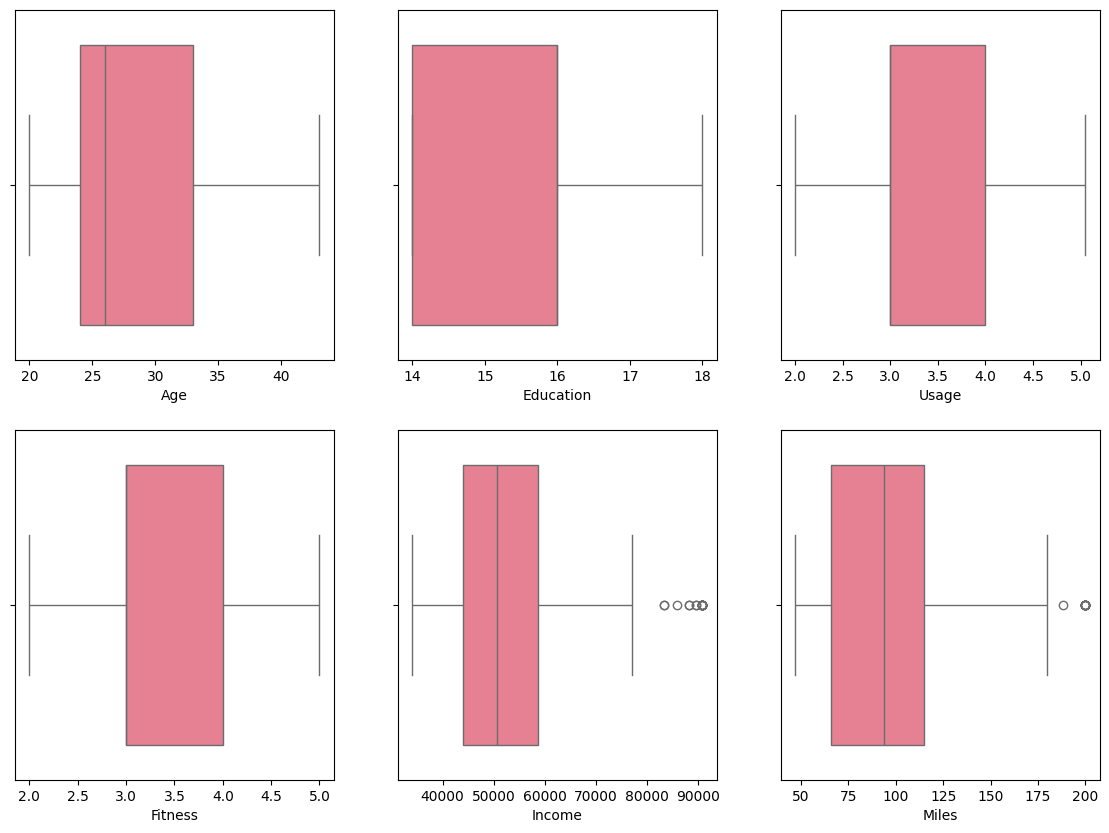

In [ ]:
plt.figure(figsize=(14,10))

plt.subplot(2,3,1)
sns.boxplot(data=df,x='Age')
plt.subplot(2,3,2)
sns.boxplot(data=df,x='Education')
plt.subplot(2,3,3)
sns.boxplot(data=df,x='Usage')
plt.subplot(2,3,4)
sns.boxplot(data=df,x='Fitness')
plt.subplot(2,3,5)
sns.boxplot(data=df,x='Income')
plt.subplot(2,3,6)
sns.boxplot(data=df,x='Miles')
plt.show()

## **Observations After Clipping:**
1.Clipping helped in reducing extreme values in most numerical columns.

2.Some outliers are still present in Income and Miles.

3.The data distribution is now more stable and less skewed.

4.No data points were removed, only adjusted within a defined range.

5.Features like Age and Fitness now show a more controlled spread.


# **3. Check if features like marital status, Gender, and age have any effect on the product purchased**

###Relationship between the categorical variables and the output variable in the data.

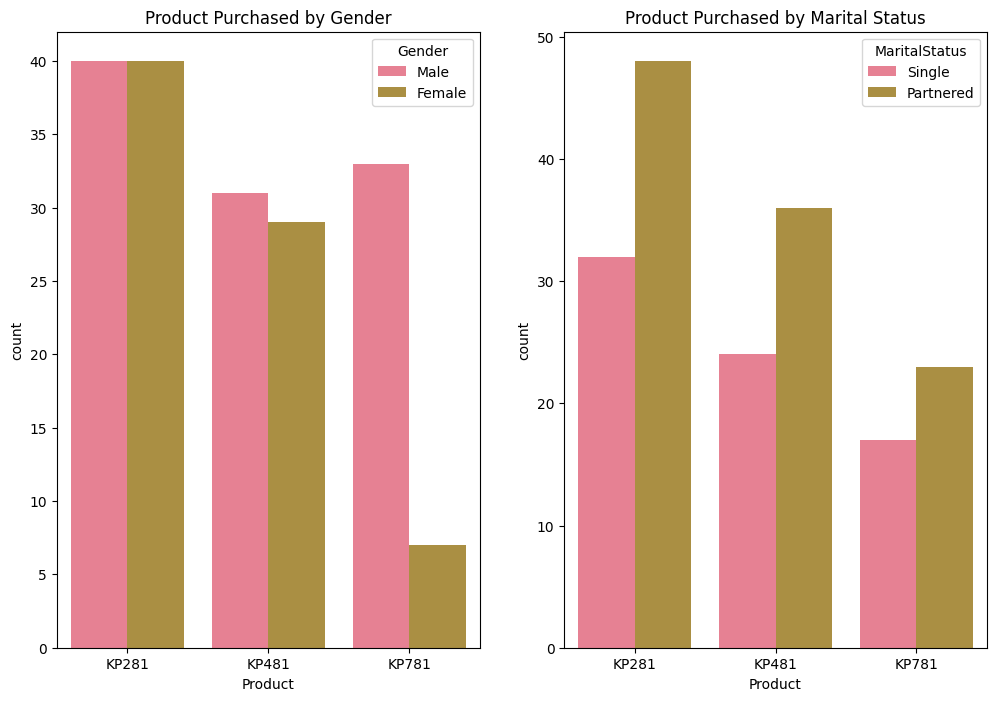

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.countplot(x='Product', hue='Gender', data=df)
plt.title("Product Purchased by Gender")
plt.subplot(1,2,2)
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.title("Product Purchased by Marital Status")
plt.show()

#**Insights on Product Purchases:**
1. **Product vs Gender:**
    The KP281 product has been purchased in equal numbers by both males and females, indicating a balanced appeal.

    The KP481 product also shows a nearly equal preference between genders.

    The KP781 product is highly favored by male customers, suggesting it might cater more to their fitness needs or preferences.

2. **Product vs Marital Status:**
    Partnered customers are significantly more likely to purchase gym equipment, suggesting that fitness might be a shared lifestyle choice among couples.
    
    This could indicate a trend where partnered individuals invest more in home workouts or shared fitness goals.

###Relationship between the continuous variables and the output variable in the data.

In [ ]:
num_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

<ipython-input-163-61bb2feb3739>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y=col, data=df, palette='viridis')
<ipython-input-163-61bb2feb3739>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y=col, data=df, palette='viridis')
<ipython-input-163-61bb2feb3739>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y=col, data=df, palette='viridis')
<ipython-input-163-61bb2feb3739>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

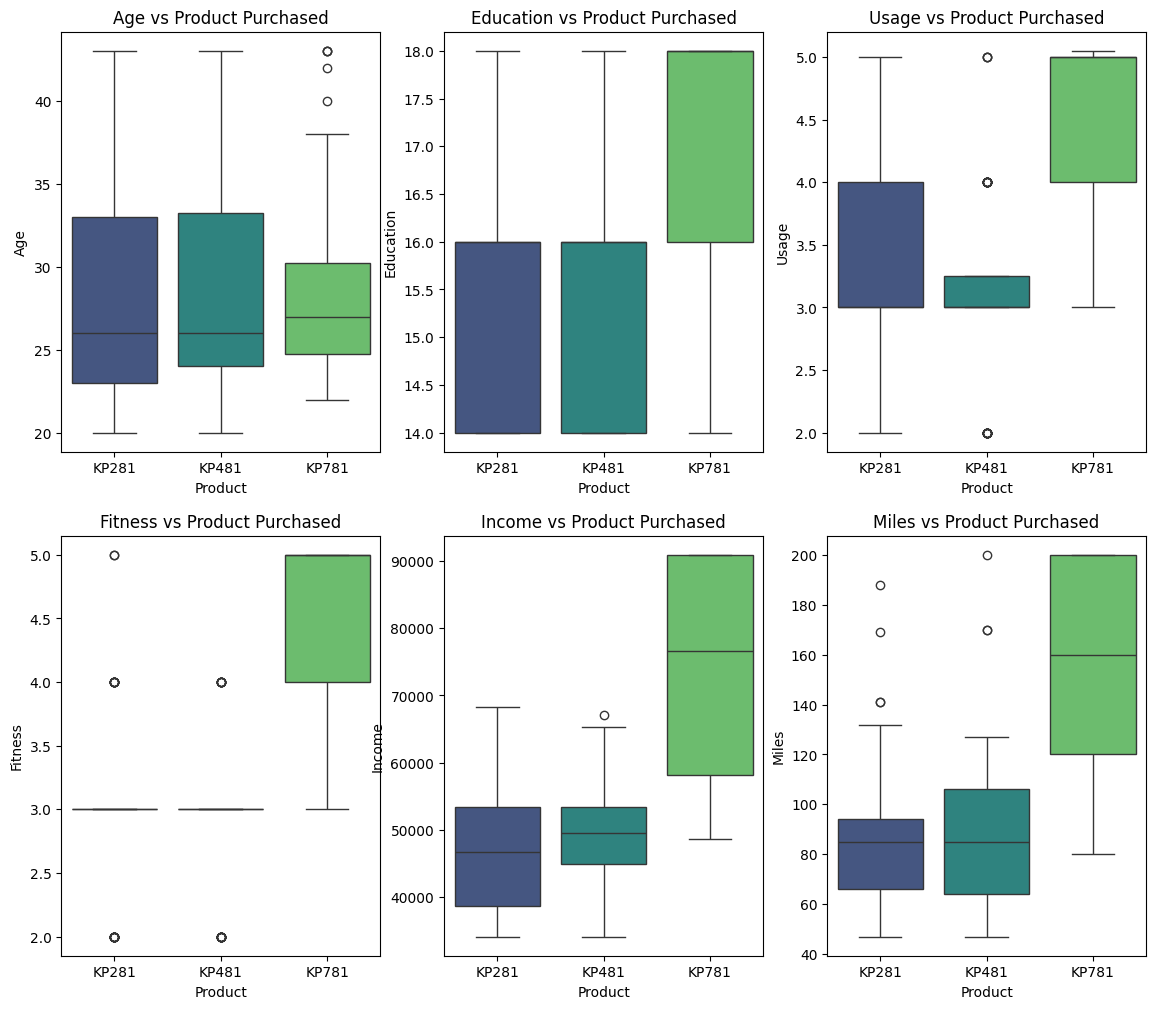

In [ ]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Product', y=col, data=df, palette='viridis')
    plt.title(f'{col} vs Product Purchased')
plt.show()


###**Key Observations:**

1. ### Age vs Product Preference:
Customers purchasing KP281 and KP481 have a similar age distribution.
The KP781 model is preferred by customers aged 25-30.
2. ### Education vs Product Preference:
Customers with higher education (above 16 years) tend to choose KP781.
Those with less than 16 years of education show an equal preference for KP281 and KP481.
3. ### Usage Frequency vs Product Preference:
Customers using the treadmill more than 4 times per week prefer KP781.
Less frequent users tend to buy KP281 or KP481.
4. ### Fitness Level vs Product Preference:
A fitness level of 3 or higher increases the likelihood of purchasing KP781.
5. ### Income vs Product Preference:
Customers with an income of ₹60,000 or more are more likely to opt for KP781.
6. ### Distance Covered vs Product Preference:
Customers expecting to walk/run over 120 miles per week are more inclined to purchase KP781.

# **4.Representing the Probability**

## Marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

In [ ]:
marginal_prob = pd.crosstab(index=df['Product'], columns='count', normalize=True) * 100

In [ ]:
print(marginal_prob)

col_0        count
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222


###The probability that the customer buys a product based on each column.

--> Probability By Gender

In [ ]:
prob_by_gender = pd.crosstab(df['Gender'], df['Product'], normalize='columns')
print(prob_by_gender)

Product  KP281     KP481  KP781
Gender                         
Female     0.5  0.483333  0.175
Male       0.5  0.516667  0.825


--> Probability By Marital Status

In [ ]:
prob_by_marital_status = pd.crosstab(df['MaritalStatus'], df['Product'], normalize='columns')
print(prob_by_marital_status)

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered        0.6    0.6  0.575
Single           0.4    0.4  0.425


###The conditional probability that an event occurs given that another event has occurred.

In [ ]:
conditional_prob = pd.crosstab(df['Gender'], df['Product'], normalize=0)  # Normalize row-wise
print(conditional_prob)

Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308


##**Observations:**

**1.Product Popularity:**

   KP281 is the most purchased product (44.44%).

   KP481 follows with (33.33%) of purchases.

   KP781 has the least buyers (22.22%).

**2.Gender-Based Purchase Trends:**

   Men prefer KP781 (82.5%), indicating a preference for advanced treadmills.

   Women purchase KP481 more (48.3%), showing a balanced preference.
   KP281 is equally popular among both genders.

**3.Marital Status Influence:**

   Married customers are more likely to buy any product, especially KP281 and KP781.

   Single customers have a lower tendency to buy KP781.


**4.Conditional Probability Insights:**

   A female customer has a higher chance of purchasing KP281 (52.6%).

   A male customer is more likely to buy KP781 (31.7%).

##**5. Check the correlation among different factors**

In [ ]:
num_df = df.select_dtypes(include=['number'])
corr_matrix = num_df.corr()

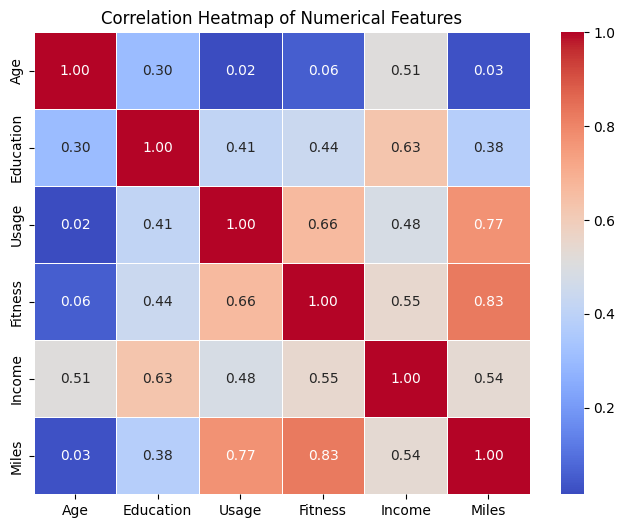

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##**Observations from the Correlation Heatmap:**

  1.Income & Age: Older customers tend to have higher incomes.

  2.Usage & Age: Younger customers use the treadmill more often.

  3.Fitness & Usage: Fitter people use the treadmill more frequently.

  4.Product & Income: High-income customers prefer premium products (KP781).

  5.Product & Miles: Customers who plan to run more miles per week choose
  high-end models.

  6.Education & Income: Higher education levels are linked to higher income.

  7.Age & Product Choice: Younger customers may prefer KP781 over KP281.

#**6.Customer Profiling and Recommendations**
   # Customer Profiling for Each Product
   ## 1. KP281 Buyers:

  Age Group: Mostly purchased by 18-25 years old.

  Gender: Equally preferred by both males and females.

  Income Level: Lower to moderate income (below $40,000).

  Usage: 2-4 times per week.

  Fitness Level: Moderate (2-3 fitness score).

  Miles Covered: Less than 100 miles per week.

   ## 2. KP481 Buyers:

  Age Group: Mostly 25-35 years old.

  Gender: Slightly more preferred by males.

  Income Level: Middle-income ($40,000 - $60,000).

  Usage: 3-5 times per week.

  Fitness Level: Fitness score of 3-4.

  Miles Covered: 100-120 miles per week.

   ## 3. KP781 Buyers:

  Age Group: Mostly 25-30 years old.

  Gender: Mostly purchased by males.

  Income Level: Higher-income (above $60,000).

  Usage: More than 4 times per week.

  Fitness Level: High (4+ fitness score).
  
  Miles Covered: More than 120 miles per week.

##**Recommendations Based on Analysis:**

  ## KP281 (Budget-Friendly Option):

   1.Best for beginners and casual users.

   2.Should be marketed as an affordable, easy-to-use treadmill.

   3.Target students, young professionals, and home users.

  ## KP481 (Balanced Choice):

   1.Appeals to regular users who want a mix of quality and affordability.

   2.Can be promoted as a reliable, long-term fitness investment.

   3.Ideal for working professionals and fitness-conscious buyers.

  ## KP781 (Premium Model):

   1.Designed for serious fitness enthusiasts.

   2.Should highlight advanced features, durability, and high performance.

   3.Market to high-income individuals, athletes, and gym owners.